Se clona el archivo WeatherAUS.csv que se encuentra en un repositorio de GitHub.

In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
!git clone "https://github.com/edithro/CODERHOUSE-DATASCIENCE-ANALISIS-DE-LLUVIA.git"

Se importan las librerias necesarias para realizar el análisis pertinente.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Se abre el archivo del repositorio en pandas. Formato Dataframe

In [4]:
df = pd.read_csv("/content/CODERHOUSE-DATASCIENCE-ANALISIS-DE-LLUVIA/weatherAUS.csv")
df['Date'] = df['Date'].astype('datetime64[ns]') #Se cambia el tipo de dato a fecha.
df['Fecha'] = df['Date'] #Se crea la columna Fecha
df =df.sort_values('Date', ascending = True) #Se ordena la columna Date en forma Ascendente
df = df.set_index('Date') #Se establece la columna Date como index

In [ ]:
df.columns #Consulta de columnas del dataframe

In [ ]:
df.shape #Consulta de la forma del dataframe en filas y columnas

In [ ]:
df.info() #Consulta detalle del dataframe, se observan tipos y valores faltantes

In [ ]:
df.head() #Visualización de los primeros 5 filas del dataframe

Se cambia los campos de tipo objeto a category de las siguientes columnas:

In [8]:
df['Location']=df['Location'].astype('category')
df['WindGustDir']=df['WindGustDir'].astype('category')
df['WindDir9am']=df['WindDir9am'].astype('category')
df['WindDir3pm']=df['WindDir3pm'].astype('category')
df['RainToday']=df['RainToday'].astype('category')
df['RainTomorrow']=df['RainTomorrow'].astype('category')

In [10]:
#Se rellenan con cero los vacios en la colmna Rainfall. Se considera que al no haber medición no hubo precipitaciones.
df['Rainfall'] = df['Rainfall'].fillna(0)

In [ ]:
#Se crea un dataframe a partir del valor agrupado Fecha - Año tomando la totalidad de las precipitaciones por año.
RainFallYear = df.Rainfall.groupby(df.Fecha.dt.year).sum().to_frame()
RainFallYear

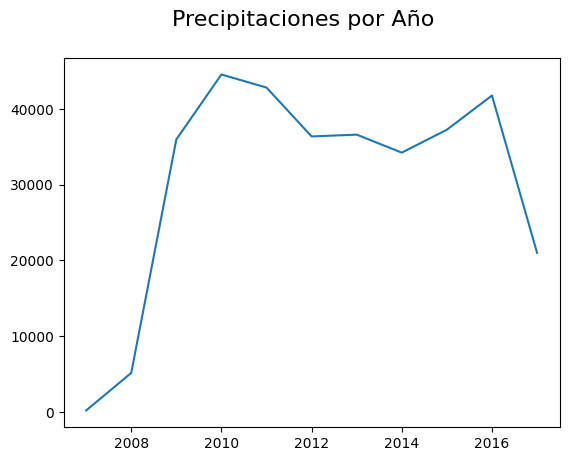

In [12]:
#Se crea un gráfico de línea para determinar la tendencia de la totalidad de las lluvias a lo largo de los años en análisis.
plt.figure().suptitle('Precipitaciones por Año', fontsize=16)
plt.plot(RainFallYear.Rainfall)

Se observa del gráfico que antecede que los años con mayor cantidad de precipitaciones fueron los años 2010 y 2016. El año 2008 se encuentra muy por debajo de los valores registrados en los años posteriores. 2007 y 2017 quedan fuera de análisis por falta de datos

In [ ]:
#Se crea un dataframe a partir del valor agrupado Fecha - MesNro tomando la totalidad de las precipitaciones por mes en cada uno de los años.
RainFallMonth = df.Rainfall.groupby(df.Fecha.dt.month).sum().to_frame()
RainFallMonth

In [ ]:
#Se crea la serie PrecipitacionesAcum a partir del dataframe RainFallMonth y contiene el total de las precipitaciones por mes
PrecipitacionesAcum = RainFallMonth.Rainfall
PrecipitacionesAcum

Text(0.5, 0, 'Mes')

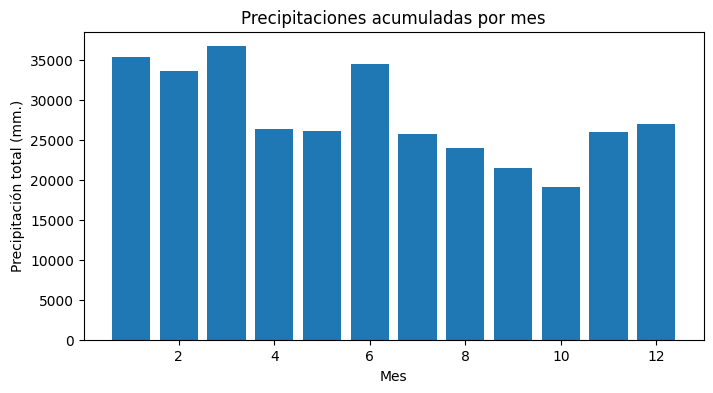

In [18]:
#Se crea grafico de barras con el total de las precipitaciones por acumuladas por mes.
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(RainFallMonth.index, PrecipitacionesAcum)
ax.set_title('Precipitaciones acumuladas por mes')
ax.set_ylabel('Precipitación total (mm.)')
ax.set_xlabel('Mes')

Del gráfico se puede inferir que el mes con mas precipitaciones es Marzo y el de menor precipitación es Octubre. Si realizamos una observación un poco mas detallada podemos decir que el primer trimestre de todos los años fueron los de mayor cantidad de agua acumulada medido en mm.

In [20]:
#Se rellenan los valores faltantes del campo Humidity9am con la media.
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

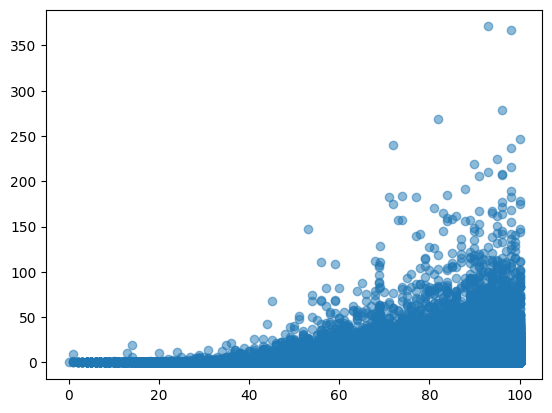

In [21]:
#Se crea un gráfico del tipo scatter para evaluar la relación entre la humedad y la cantidad de lluvia caída.
fig, ax = plt.subplots()
ax.scatter(df['Humidity9am'],df['Rainfall'], alpha=0.5)

Observando la relación entre la humedad a las 9 am y la cantidad de lluvia caída se podría inferir que a un mayor porcentaje de humedad, mayor cantidad de precipitaciones.

In [ ]:
#Se crea el datafram RainFall2016 a partir de valores filtrados. Se toman los datos registrados durante el año 2016 y de la locación Camberra
#Con el fin de determinar si lo observado en el gráfico anterior es coincidente.
RainFall2016 = df.loc['2016-01-01':'2016-12-31']
RainFall2016 = RainFall2016[RainFall2016['Location']=='Canberra']
RainFall2016

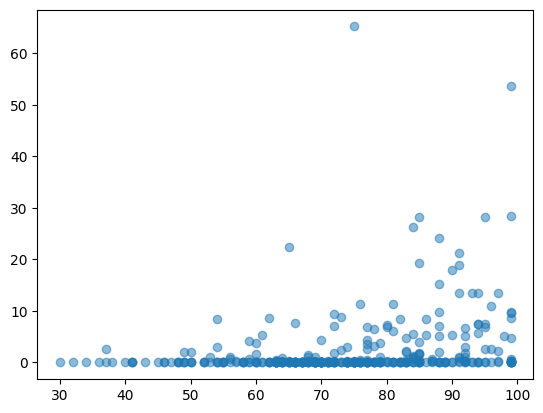

In [23]:
#Se genera nuevamente un gráfico scatter con las mismas variables pero utilizando el dataframe del año 2016
fig, ax = plt.subplots()
ax.scatter(RainFall2016['Humidity9am'],RainFall2016['Rainfall'], alpha=0.5)

Se observa finalmente que no hay una relación entre humedad y cantidad de lluvia en la locación seleccionada.

In [24]:
#Se completa los datos faltantes del campo MaxTemp con la temperatura máxima media
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

<Axes: xlabel='MaxTemp', ylabel='Count'>

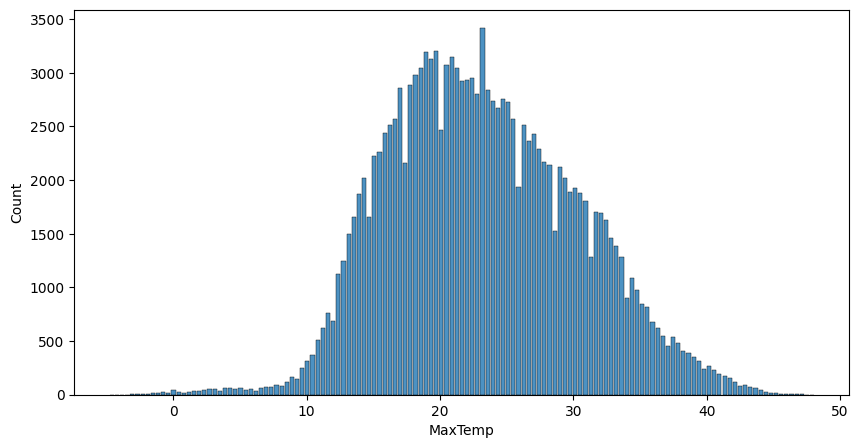

In [25]:
#Se genera un histograma con las temperaturas máximas registradas
f, axs = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x="MaxTemp", shrink=.8, alpha=.8, legend=False)

Se observa que las temperaturas máximas registradas rondan entre los 16 y 25 grados aproximadamente. Se observan valores por debajo de los ceros grados y temperaturas máximas por encima de los 40.

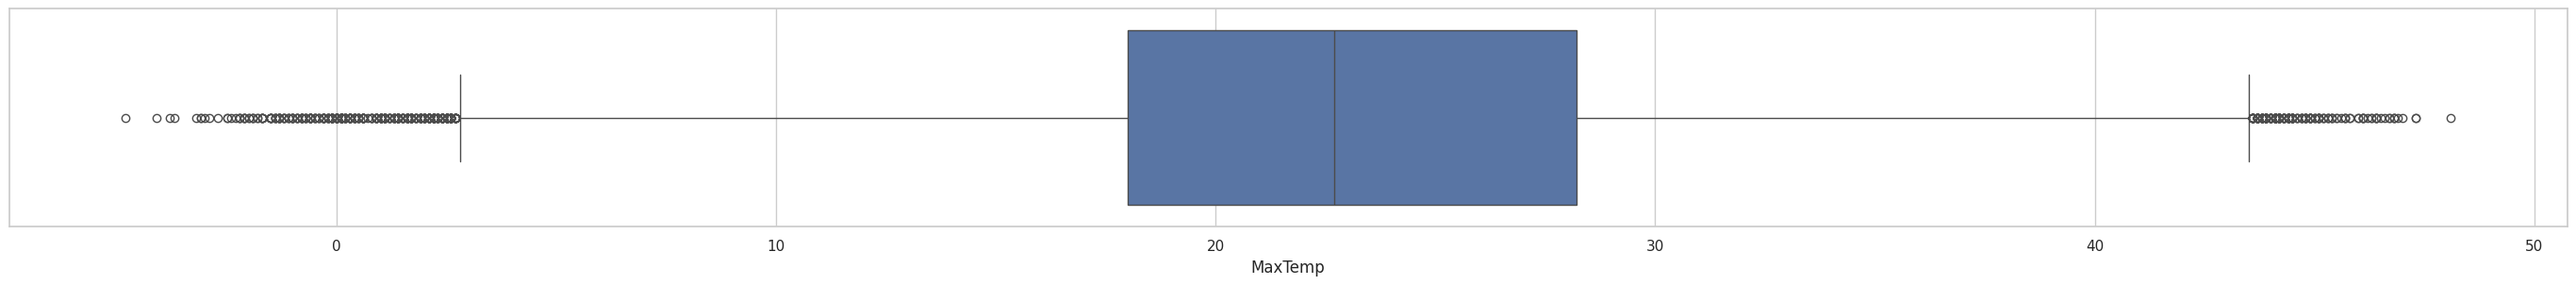

In [26]:
#Se crea un boxplot para observar con mayor detenimientos la existencia de outliers tomando como campo observado, la temperatura máxima.
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(35, 3))
ax = sns.boxplot(x=df["MaxTemp"])

Tal como se observó en el histograma, presentamos outliers en ambos sentidos.

In [ ]:
df.loc[df["MaxTemp"]<0]#Se analiza que existen temperaturas por debajo de los 0 grados y se corresponden con las épocas invernales.

In [27]:
#Se crea un dataframe RainYearMonth el cual contiene la totalidad de las precipitaciones agrupados por años y por mes
RainYearMonth = df.Rainfall.groupby([df.Fecha.dt.year,df.Fecha.dt.month]).sum().to_frame()
#este dataframe contiene un multiple indice con el mismo nombre Fecha, uno contiene el año y el otro el mes
RainYearMonth=RainYearMonth.reset_index(level=1)#Se resetea el index que contiene la columna mes
RainYearMonth.index.rename('Año', inplace=True)#Se cambia el nombre del index Fecha que contiene el año a Año
RainYearMonth.rename(columns={'Fecha': 'Mes'}, inplace=True)#Se modifica el nombre de la columna Fecha que contiene el mes a Mes
Enero =  RainYearMonth.loc[RainYearMonth['Mes']==1].drop('Mes', axis = 1) #Se crea la serie Enero que contiene las lluvias de enero por año, se elimina la columna Mes
Febrero =  RainYearMonth.loc[RainYearMonth['Mes']==2].drop('Mes', axis = 1)#Se crea la serie Febrero que contiene las lluvias de febrero por año, se elimina la columna Mes
Marzo =  RainYearMonth.loc[RainYearMonth['Mes']==3].drop('Mes', axis = 1)#Se crea la serie Marzo que contiene las lluvias de marzo por año, se elimina la columna Mes

Text(0, 0.5, 'Precipitación (mm.)')

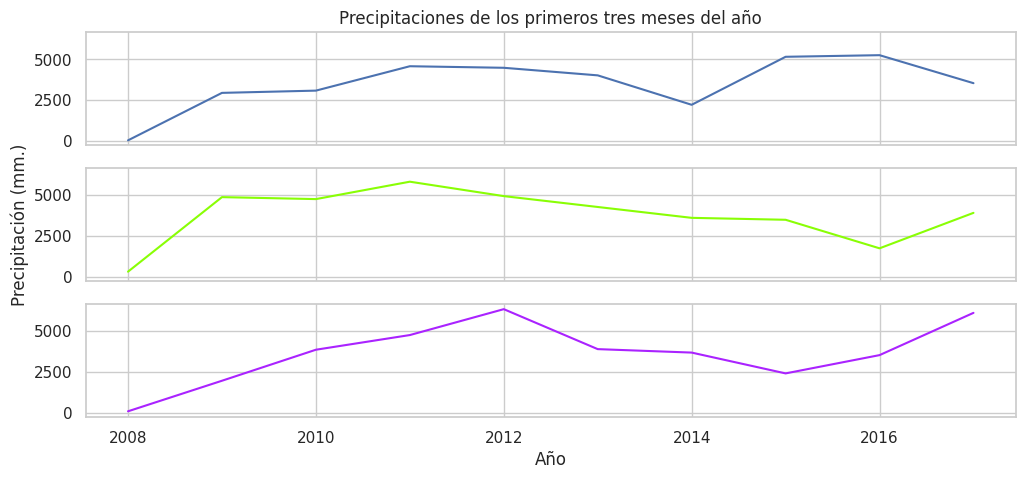

In [28]:
#A raíz de la observación de que el primer trimestre es el trimestre con mayor cantidad de precipitaciones, se busca analizar la tendencia
#de las mismas en los años analizados
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)
ax[0].plot(Enero.index, Enero, label='Precipitaciones de enero')
ax[1].plot(Febrero.index, Febrero, label='Precipitaciones de febrero', color='#89fe05')
ax[2].plot(Marzo.index, Marzo, label='Precipitaciones de marzo', color='#aa23ff')
ax[0].set_title('Precipitaciones de los primeros tres meses del año')
ax[2].set_xlabel('Año')
ax[1].set_ylabel('Precipitación (mm.)')

Si bien del primer gráfico se determinó que el año con mayor precipitacion fue el año 2010, si observamos de manera individual el comportamiento de las lluvias durante el primer trimestre de cada año en particular. Se puede inferir que el año 2012 fue el año con mayor cantidad de lluvia acumulada.